09/11/2016  
by Numan Laanait  
email: laanaitn@ornl.gov


# Data Format


Outline:  
1. ##Intro to hdf5 + Resources.
2. ##How to read Data.
3. ##How to plot Data.

##Intro to hdf5 + Resources.
HDF5 format is one of the most popular data formats for large data sets. In a nutshell, all the data is saved into a single file. Within this file, one can have multiple folders, subfolders, etc...

As opposed to a boring compressed folder structure, HDF5 supports data referencing, metadata management, object-oriented programming approach to I/O and many other goodies.

See these links for:

* Intro to HDF5: [intro](http://docs.h5py.org/en/latest/quick.html#quick).   
* HDF5 Viewer to look at files [viewer](https://www.hdfgroup.org/products/java/hdfview/)

I use h5py, which is a python API for HDF5 to read/write data, metadata etc.

##How to read Data

First of all. Ipython (Jupyter) notebooks are a great way to keep track of what's being done on the analysis part.  
As well as providing a succinct summary of the results, issues, goals, etc...  
I use them with most of my collaborators.  
Finally, I only use open-source software. You can download the Anaconda Python Distribution ([here](https://www.continuum.io/downloads)) or use your preferred python distribution.  
If you have a preferred programming language, Fortran, C, etc... you can write code in there. And we'll call it from Python.  
If your preferred programming language is not open-source then consider learning Python (it's easy to pick up, especially the numerical aspect of it).

In [1]:
# Imports
import numpy as np
import os
from matplotlib import pyplot as plt
import h5py as h5
#from PyXRIM.PlotLib import imageGallery
#from PyXRIM.misc import TranslationTransform, RigidTransform 
#from PyXRIM.FeatureExtraction import FeatureExtractor
#from PyXRIM.GeometricTransforms import geoTransformer
%matplotlib notebook

###Let's open the HDF5 file, with the X-ray diffraction microscopy data for this project.

In [2]:
# open h5file
#fname = '/home/nl7/work/xray_data/LiCoO2_Al2O3_20160330.hdf5'
fname = 'D:\Libraries\Documents\Materials Informatics\LiCoO2_Al2O3_20160330.hdf5'
f = h5.File(fname, mode='r') 
# Always open in read mode 'r'.
# Until you're ready to write into the file. This is especially true if your OS is not Unix-based like Windows.
rawg = f['20160330/Raw']
procg = f['20160330/Process']

###HDF5 has 2 objects that we use, Group object and Dataset object. The former is a folder, the latter is a numpy array.

In [3]:
# Let's read a group and a dataset from that group
groupRaw = f['20160330/Raw']
dset = groupRaw['S025']

### Each object has a bunch of methods and attributes. For instance, with dataset *dset* we can access its shape, its type, its parent group, etc...

In [4]:
print dset.shape
print dset.dtype
print dset.parent

(233, 1024, 1024)
uint16
<HDF5 group "/20160330/Raw" (52 members)>


Note that by reading *dset* we only read the reference that points to the object. We did not read the data into memory. This is crucial because some datasets can exceed the memory size you have accessible. With HDF5 we can read only a portion of the data or read it all.
### Let's look more closely at the data shape.
233: # number of images (z-direction).  
1024: # number of pixels in the y direction.  
1024: # number of pixels in the x direction.  
### Let's read a single image from the dataset and plot it.

(1024L, 1024L)


<IPython.core.display.Javascript object>


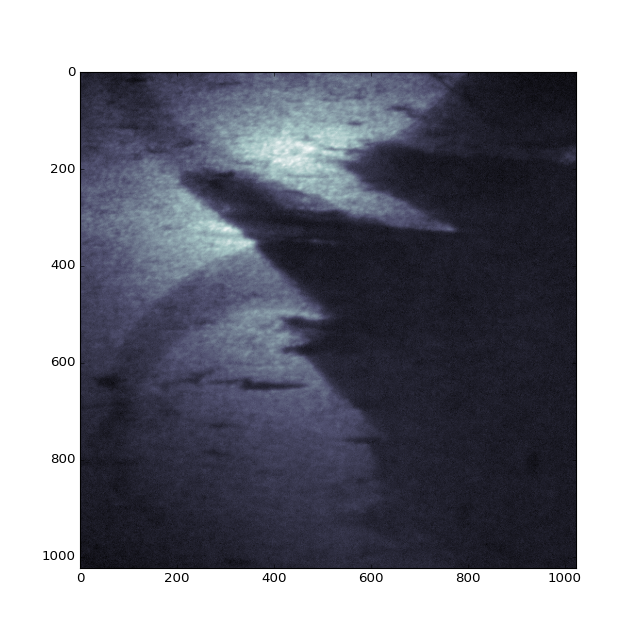

In [5]:
# Let's read image # 100
imp = dset[100,:,:]
print imp.shape
fig = plt.figure(figsize=(8,8))
plt.imshow(np.log(imp), cmap='bone')

### We can load all the data present in the dataset into memory

In [8]:
# this way, by numpy slicing.
arr = dset[:]
print arr.shape
# or this way, by accessing the value attribute.
arr = dset.value
print arr.shape

(233L, 1024L, 1024L)
(233L, 1024L, 1024L)


### Let's look at all the image present in this _dset_
For this we'll import a custom function from the functions.py file. For starters, if we write a new function put it into functions.py and then import it. As we progress in this project, I'll invite you to start contributing analysis code to a Python Library [link](https://pycroscopy.github.io/pycroscopy/)

In [9]:
from functions import scaling, imageTile
# Let's scale the image values first
#scaled = np.array([scaling(imp) for imp in dset])
# Then the tile plot
#imageTile(scaled, padsize=1, padval=1, cmap='bone',vmax=0.9)

In this particular instance, we're looking at a fixed diffraction condition ($2\theta$) and only changing the electric potential applied to the LiCoO2.   
To figure out the values for these 2 metadata components. Let's use the attributes method of _dset_.  
### Let's look at some attributes.

[ 15.1965]


<IPython.core.display.Javascript object>


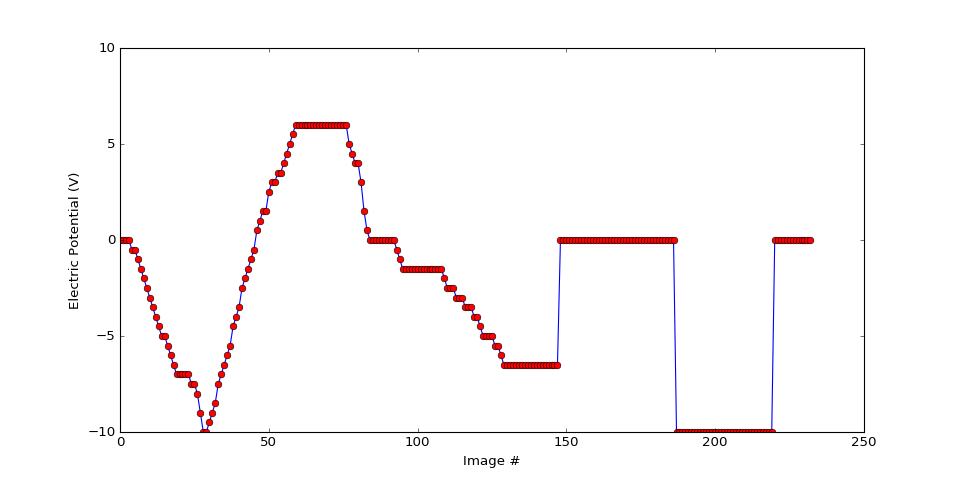

(-10, 10)

In [10]:
# 2theta is 'delta', degrees
delta = dset.attrs['delta']
print delta
# Potential is DAC5
V = dset.attrs['DAC5']
fig,ax = plt.subplots(1,1,figsize=(12,6))
ax.plot(np.arange(dset.shape[0]),V, marker='o', markerfacecolor='r')
ax.set_xlabel('Image #')
ax.set_ylabel('Electric Potential (V)')
ax.set_ylim(-10,10)

Here are all the attributes (metadata) of _dset_. We'll need a lot of them to analyze the data.

In [11]:
 dset.attrs.keys()

[u'slitJJhce',
 u'cols',
 u'Lattice',
 u'filters',
 u'slitJJvap',
 u'RLattice',
 u'imtot',
 u's1hce',
 u'exptime',
 u'scandatum',
 u's2hce',
 u's1vce',
 u'Hexapod_U',
 u'slitJJvce',
 u'Hexapod_W',
 u'Hexapod_V',
 u'slitJJhap',
 u'Hexapod_X',
 u'energy',
 u'Hexapod_Z',
 u'or0',
 u'or1',
 u'Epoch',
 u'ccdNumExposures',
 u'or1Lambda',
 u'or1Angles',
 u's1l',
 u's1b',
 u'scan_command',
 u'comments',
 u'StackZ',
 u'seconds',
 u'Motor16',
 u'setkeys',
 u'scan_type',
 u's1vap',
 u's02hap',
 u'sixcAngleNames',
 u'eta',
 u'obz',
 u'obx',
 u'oby',
 u'or0Angles',
 u's02vap',
 u'Hexapod_Y',
 u'ccdNumImages',
 u's1r',
 u'imroi2',
 u'imroi3',
 u'alphabeta',
 u's02hce',
 u'imroi4',
 u'delta',
 u'Qvec',
 u's02vce',
 u'scanno',
 u's2vce',
 u'trans',
 u's1t',
 u'Energy',
 u'Time',
 u'scan',
 u'wavelength',
 u's2b',
 u'or0Lambda',
 u's2l',
 u's2r',
 u's2t',
 u'nu',
 u'fourcAngleNames',
 u'phi',
 u'imroi1',
 u's1hap',
 u'wirex',
 u'corrdet',
 u'azimuth',
 u's2vap',
 u'omega',
 u'DAC5',
 u'dummy',
 u's2hap

###Homework
To get used to HDF5 and manipulating the data (numpy).
Write code that does the following:

1. Do a tile plot of only a portion (200x200) of the images.
2. Plot the average intensity of each image as a function of some metadata (e.g. 'DAC5', 'Time', etc...)
3. Same as 1. But take a (200x200) window surrounding the maximum intensity in each image.
4. Write a python function that returns the value of any attribute for just a single image x, i.e. dset[x].
    the function should take as input: attribute name (i.e. 'DAC5') and the data slice x, and returns the value of the attribute.
5. Advanced: create a new h5file, create a new group, copy one of the datasets from this HDF5 file to the new HDF5file. Make sure that all attributes of the old data sets are also copied.

(200L, 200L)


<IPython.core.display.Javascript object>


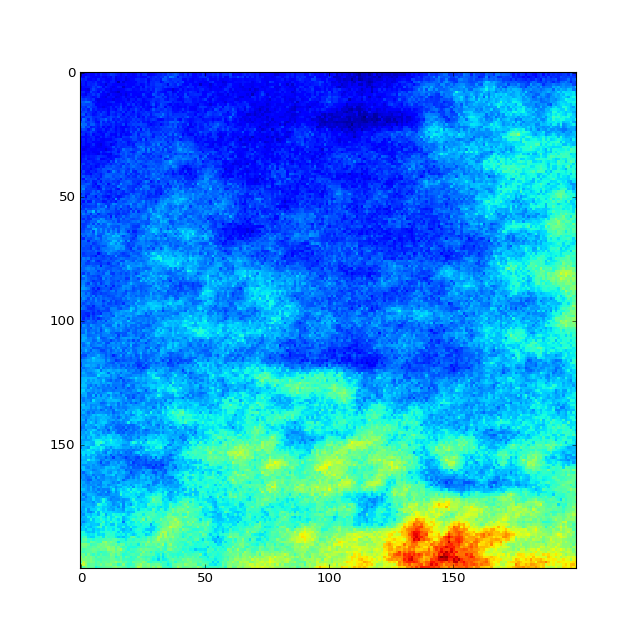

In [16]:
imp = dset[100,0:200,0:200]
print imp.shape
fig = plt.figure(figsize=(8,8))
plt.imshow(imp, interpolation='nearest')


233


<IPython.core.display.Javascript object>


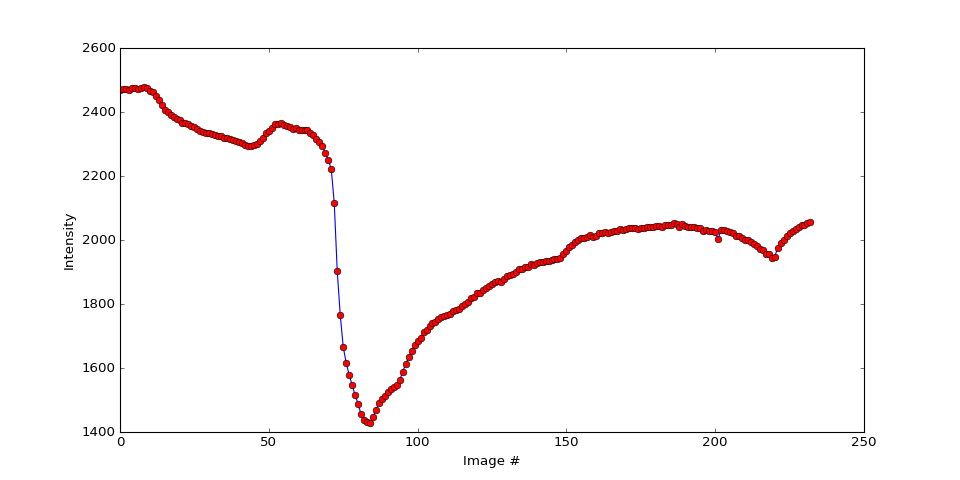

In [38]:
mns = []
for i in range(0,dset.shape[0]-1):
    #print np.mean(dset[i,0:2,0:2])
    mns.append(np.mean(dset[i,:,:]))

print dset.shape[0]

fig,ax = plt.subplots(1,1,figsize=(12,6))
ax.plot(np.arange(dset.shape[0]),mns, marker='o', markerfacecolor='r')
ax.set_xlabel('Image #')
ax.set_ylabel('Intensity')

In [ ]:
print attr